#Import & setup

In [ ]:
%pip install tensorflow keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
%pip install opendatasets #{"username":"phuongleanh","key":"bfb9d4fb494830b2319c202c71c7977f"}
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shubh0799/churn-modelling/data")

Skipping, found downloaded files in "./churn-modelling" (use force=True to force download)


In [ ]:
df=pd.read_csv('/content/churn-modelling/Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#Explore data

* EDA will be showned in distribution plot, sns boxplot, scatterplot

Text(0.5, 1.0, 'Customer Churn Percentage')

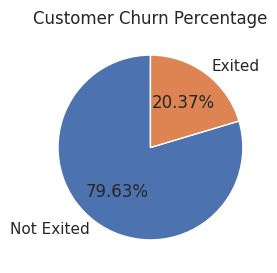

In [ ]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

plt.subplots(figsize = (4, 3))
plt.pie(values, labels=labels,autopct = '%1.2f%%',startangle = 90)
plt.title('Customer Churn Percentage')

In [ ]:
num_var = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_var = ['Geography','Gender','HasCrCard','IsActiveMember']

In [ ]:
for i in num_var:
  print("Variable:", i)
  print("Minimum:", df[i].min())
  print("Maximum:", df[i].max())
  print("Mean:", df[i].mean())
  print()

Variable: CreditScore
Minimum: 350
Maximum: 850
Mean: 650.5288

Variable: Age
Minimum: 18
Maximum: 92
Mean: 38.9218

Variable: Tenure
Minimum: 0
Maximum: 10
Mean: 5.0128

Variable: Balance
Minimum: 0.0
Maximum: 250898.09
Mean: 76485.889288

Variable: NumOfProducts
Minimum: 1
Maximum: 4
Mean: 1.5302

Variable: EstimatedSalary
Minimum: 11.58
Maximum: 199992.48
Mean: 100090.239881



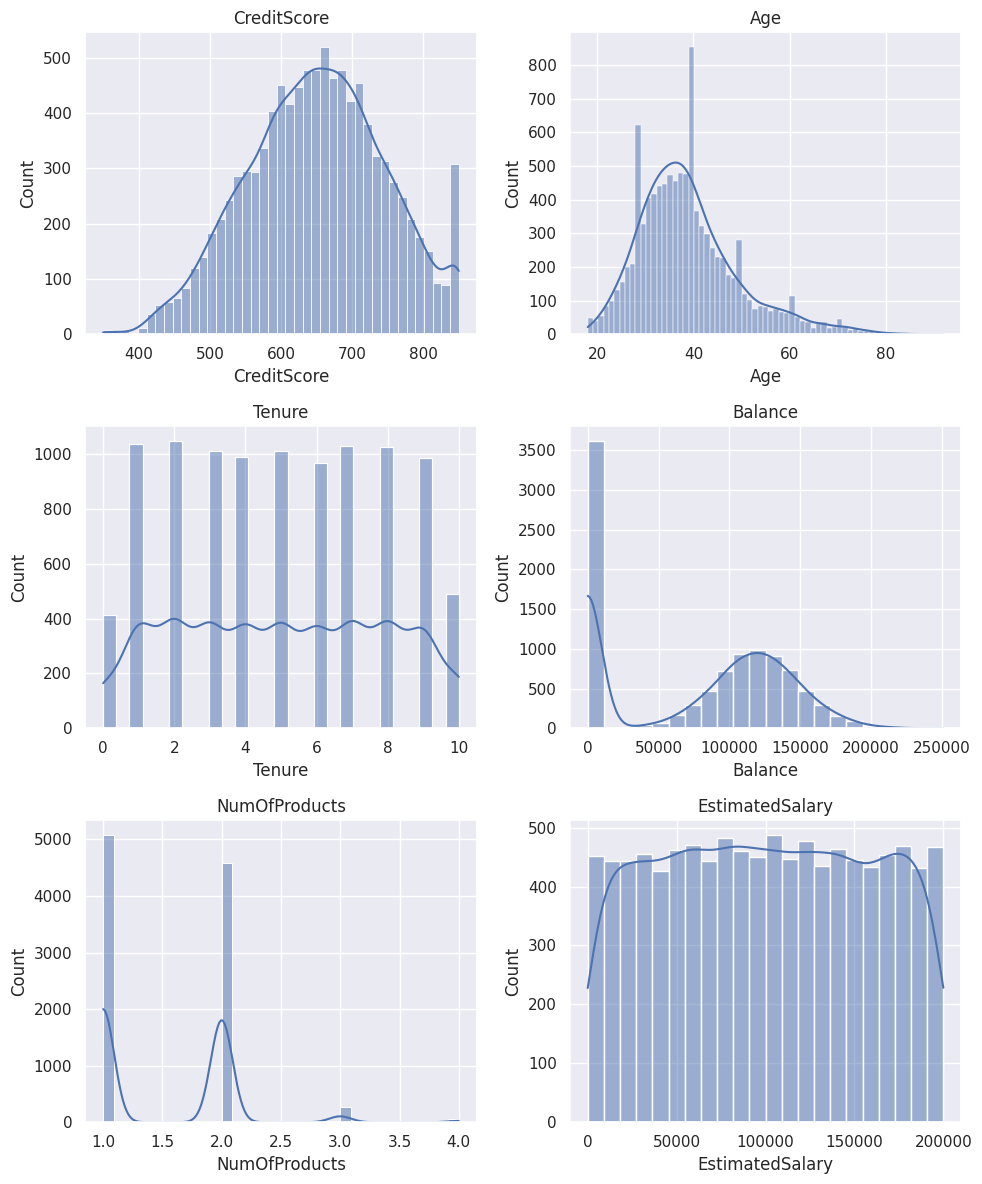

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
sns.set(rc={'figure.figsize':(10,6)})
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(data=df[num_var[i]], kde=True, ax=ax)
    ax.set_title(num_var[i])

plt.tight_layout()

Credit Score and Age has skewed distribution. While Tenure, Balance, Number of Products and Estimated Salary do not follow any specific distributions.

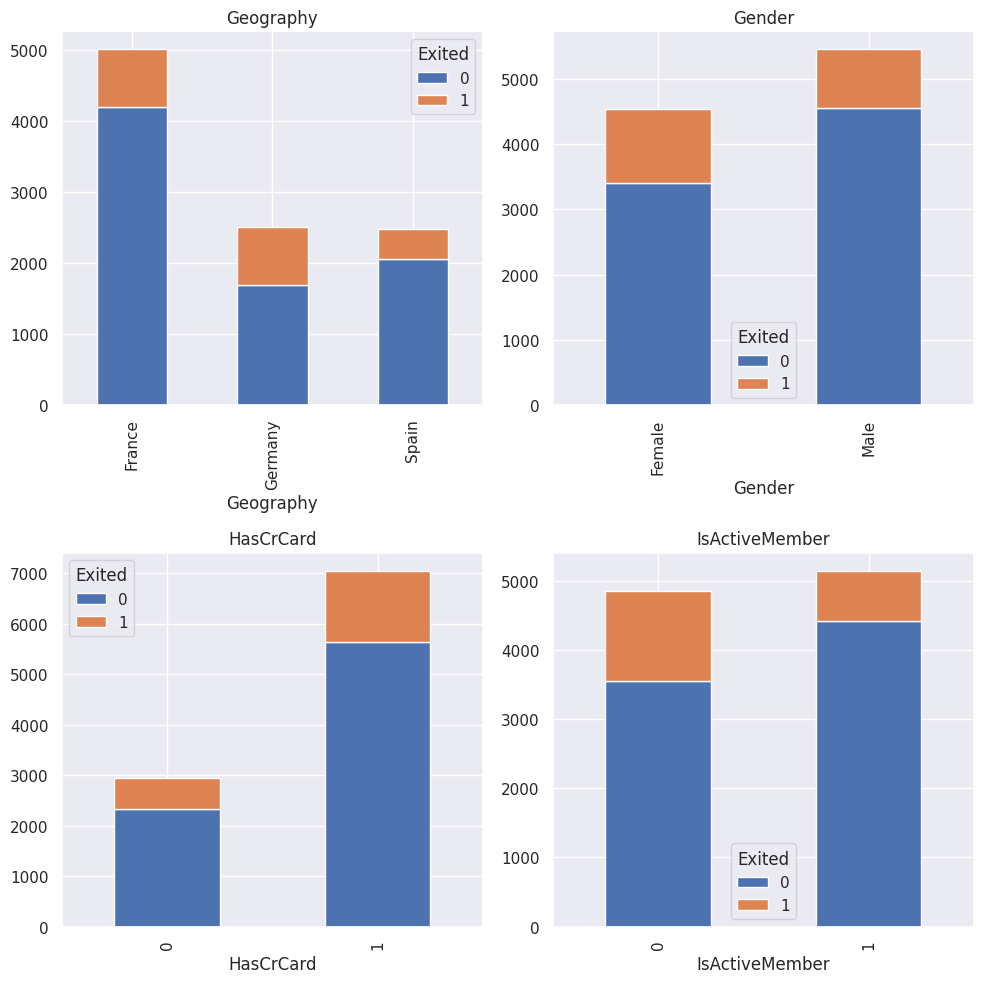

In [ ]:
fig,axes =plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

for i, x in enumerate(cat_var):
    ax = axes[i]
    df.groupby([x,'Exited']).size().unstack().plot(kind='bar', ax=ax,stacked=True)
    ax.set_title(x)

plt.tight_layout()

* Geography: Germany has the greatest number of exited customers whereas Spain witness the lowest rate of customer exit.

* Gender:Males are more likely to exit rather than female

* Credit card processing: having credit card is more likely to exit rather than not having credit card

* Active member: Non-active member has higher probability of exit

#Preprocess data

In [ ]:
df=pd.get_dummies(df, columns=['Geography','Gender'])

<Axes: >

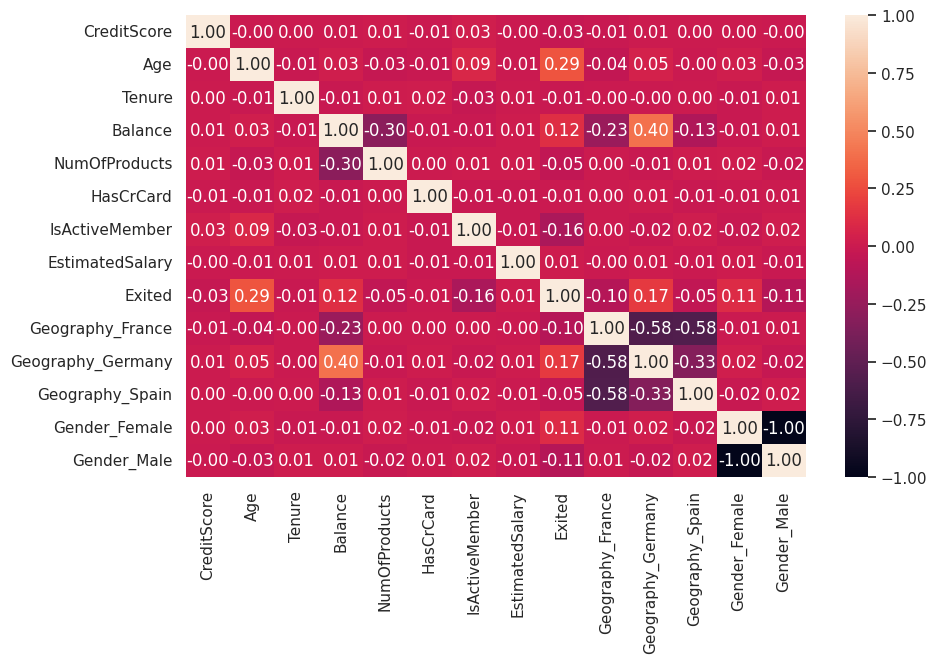

In [ ]:
sns.heatmap(df.corr(), annot=True,fmt=".2f")

It seems like Age, Balance, Geography and Gender tend to have positive correlation with the probability of customer Exit or not.

In contrast, there's negative correlation between Exit versuus IsActiveMember.

#Split dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [ ]:
X = df.iloc[:,[col for col in range(14) if col !=8]].values

In [ ]:
y=df['Exited']

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (6000, 13) y_train.shape (6000,)
X_cv.shape (2000, 13) y_cv.shape (2000,)
X_test.shape (2000, 13) y_test.shape (2000,)


#Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

#Build model

In [ ]:
model = Sequential(
    [
        Dense(13, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name='input'),
        Dense(6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1), name='hidden'),
        Dense(1,activation='sigmoid',name='output')
    ]
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)

)

In [ ]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
188/188 [==============================] - 1s 2ms/step - loss: 0.6481
Epoch 2/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4896
Epoch 3/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4820
Epoch 4/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4800
Epoch 5/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 6/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4713
Epoch 7/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4692
Epoch 8/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4712
Epoch 9/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4671
Epoch 10/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4657
Epoch 11/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 12/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.4623
E

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 13)                182       
                                                                 
 hidden (Dense)              (None, 6)                 84        
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_prob = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred = (y_pred_prob>0.5)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, y_pred))

Accuracy Score 0.805


#Implement model

In [ ]:
#Geography: Spain
#Credit Score:680
#Gender: Female
#Age: 45 years old
#Tenure: 2.5 years
#Balance: $60000
#Number of Products: 2
#with Credit Card
#Active member
#Estimated Salary: $50000

newdata = [[680,45,2.5,60000,2,1,1,50000,0,0,1,1,0]]
scaled = scaler.transform(newdata)

print(model.predict(scaled))
print(model.predict(scaled)>0.5)

1/1 [==============================] - 0s 19ms/step
[[0.23969962]]
1/1 [==============================] - 0s 19ms/step
[[False]]


This customers have 23.97% to leave.